# Ten-Minute Analytics Challenge - YRBS Data

video link: https://drive.google.com/file/d/1_n5M6tF7VvlSZ346c8fV9PdUAxwPmH0x/view?usp=sharing (I also uploaded on Canvas - Panopto Video)

presentation slides: https://docs.google.com/presentation/d/1Q5NLEKYRZzwbF_aFZw216CSTNgIKJE6O/edit?usp=sharing&ouid=106307621695890170797&rtpof=true&sd=true

## Introduction

After reviewing the YRBS dataset, I believe it includes the majority of factors that closely relate to young aged people in their daily life. It is also an important research for schools and families to know about the potential mental and physical health problems for teenagers from time to time.

## Goals

My goal is to analyze the data from following aspects: Sexual behavior, Health-related behavior, Exercise and sports, Food and drink. These are important issues that I suppose to influence youths.

## Data Preparation and General Information

Firstly, I imported the libraries.

In [339]:
# Import libraries
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pylab as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
pd.set_option('display.notebook_repr_html', True)
from sklearn.datasets import load_iris
from sklearn import tree

In [340]:
def print_tree(d_tree, f_names, c_names=None):
    dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=f_names, class_names=c_names, 
                                    filled=True, rounded=True, special_characters=True)  
    #convert decision tree into dot format, so graphiz can visualize our tree
    graph = graphviz.Source(dot_data)  
    return graph 

Next, I imported the dataset. and got some basic information about it.

In [341]:
# Read the dataset
dfyr = pd.read_csv('yrbsdata.csv', na_values= '?')
dfyr.head()

,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qspeakenglish,qtransgender
0,KY,Kentucky (KY),State,2,2007,9,51.6402,28,2,648526,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,KY,Kentucky (KY),State,2,2007,9,104.2187,18,2,648527,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2,KY,Kentucky (KY),State,2,2007,9,33.2209,6,2,648528,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
3,KY,Kentucky (KY),State,2,2007,9,29.7973,29,2,648529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KY,Kentucky (KY),State,2,2007,9,29.8429,8,1,648530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [342]:
# Get the size of the dataset
dfyr.shape

(962925, 150)

In [343]:
# There are 38 states in this dataset
dfyr.sitecode.unique()

array(['KY', 'LA', 'AL', 'ID', 'HI', 'IL', 'MS', 'MT', 'AK', 'AR', 'ME',
       'MO', 'IA', 'MI', 'DE', 'FL', 'AZB', 'CO', 'KS', 'CA', 'NE', 'SC',
       'SD', 'UT', 'NC', 'NH', 'NV', 'TN', 'WI', 'WV', 'ND', 'WY', 'NY',
       'RI', 'NJ', 'OK', 'PA', 'VA'], dtype=object)

I checked the total missing values in the dataset.

In [344]:
# Checking missing values in each column
dfyr.isnull().sum()

sitecode               0
sitename               0
sitetype               0
sitetypenum            0
year                   0
                   ...  
qconcentrating    954653
qcurrentasthma    682211
qwheresleep       901102
qspeakenglish     962925
qtransgender      937987
Length: 150, dtype: int64

Then, I analyzed demographic data such as sex, age, and race.

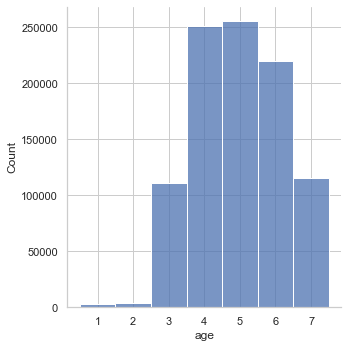

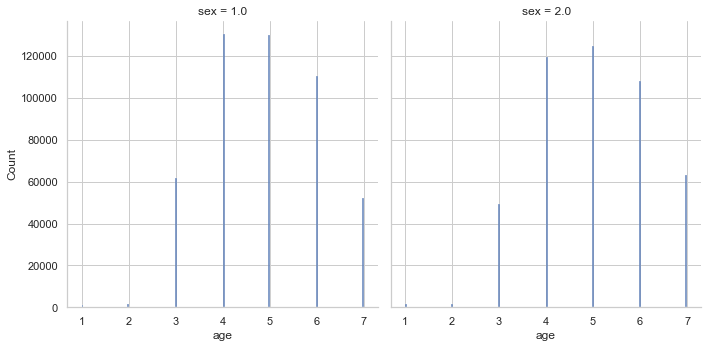

In [345]:
# Get the distribution of age and sex: Group 5 (16 years old) and Group 4 (15 years old) have the highest number
# In group 4 and 5, there is more sex 1.0 (female) 
sns.displot(dfyr, x = 'age',  bins = 10, discrete = True);
sns.displot(dfyr, x = 'age',  col = 'sex');

In [346]:
# There are more records from female in this dataset
dfyr.sex.value_counts()

1.0    488225
2.0    469019
Name: sex, dtype: int64

In [347]:
# Race group 6 (White) is the largest, and group 5 (Native Hawaiian/Other Pacific Islander) has the lowest number
pd.crosstab(dfyr.sitecode, dfyr.race7, margins=True)

race7,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
sitecode,,,,,,,,
AK,1672,695,390,901,254,5922,863,10697
AL,298,277,7884,653,44,16651,362,26169
AR,289,320,3960,1643,198,12411,527,19348
AZB,1416,421,927,9577,187,8000,609,21137
CA,23,572,190,1895,56,688,199,3623
CO,66,189,243,1596,31,3513,242,5880
DE,245,758,6439,2950,151,14055,1369,25967
FL,373,1370,9689,14035,403,19482,1559,46911
HI,118,9837,393,4534,7215,2910,4265,29272


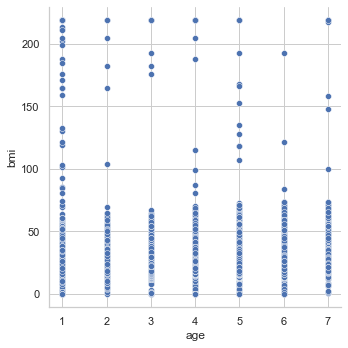

In [348]:
sns.relplot(x="age", y="bmi", data=dfyr);

More people in Group 1 (12 years old or younger) and Group 5 (16 years old) have higher bmi.

I organized the missing values and duplicates.

In [349]:
# No rows have missing values for all columns
allNansRowsDropped = dfyr.dropna(how = 'all') 
allNansRowsDropped.shape

(962925, 150)

In [350]:
# Drop columns with values missing in every row
allNanColsDropped2 = dfyr.dropna(axis = 1, how = 'all')
print(allNanColsDropped2.shape)
allNanColsDropped2.head()

(962925, 147)


,sitecode,sitename,sitetype,sitetypenum,year,survyear,weight,stratum,PSU,record,...,qfoodallergy,qwenthungry,qmusclestrength,qsunscreenuse,qindoortanning,qsunburn,qconcentrating,qcurrentasthma,qwheresleep,qtransgender
0,KY,Kentucky (KY),State,2,2007,9,51.6402,28,2,648526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1,KY,Kentucky (KY),State,2,2007,9,104.2187,18,2,648527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,KY,Kentucky (KY),State,2,2007,9,33.2209,6,2,648528,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
3,KY,Kentucky (KY),State,2,2007,9,29.7973,29,2,648529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,KY,Kentucky (KY),State,2,2007,9,29.8429,8,1,648530,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [351]:
# Compare sizes
dfyr = pd.read_csv('yrbsdata.csv', na_values = '?')
print('Original Size:', dfyr.shape)

dfyr.dropna(axis = 1, how = 'all', inplace=True)
print('Size After Dropping Columns with NaN in All Rows:', dfyr.shape)

Original Size: (962925, 150)
Size After Dropping Columns with NaN in All Rows: (962925, 147)


In [352]:
# There are no Duplicates
dfyr = pd.read_csv('yrbsdata.csv', na_values = '?')
print('Original Size', dfyr.shape)
dfyr.drop_duplicates(inplace=True)
print('Size After Dropping Duplicates', dfyr.shape)

Original Size (962925, 150)
Size After Dropping Duplicates (962925, 150)


## Data Analysis

I would like to know the condition that how teenagers were taught of sexual intercourse and related virus. Therefore, I specified the data in South Carolina (SC) in 2015.

In [353]:
# Select specific columns, and fill blank values with median
sc = dfyr.loc[894680:896034, ['sex','grade','q64','q65','sitename','year','qtaughtHIV','qtaughtstd']]
sc.fillna({'q64':sc['q64'].median(),'q65':sc['q65'].median(),'qtaughtHIV':sc['qtaughtHIV'].median(),'qtaughtstd':sc['qtaughtstd'].median()},inplace=True)
sc

,sex,grade,q64,q65,sitename,year,qtaughtHIV,qtaughtstd
894680,2.0,1.0,2.0,2.0,South Carolina (SC),2015,2.0,2.0
894681,2.0,1.0,1.0,1.0,South Carolina (SC),2015,1.0,1.0
894682,2.0,1.0,1.0,1.0,South Carolina (SC),2015,1.0,2.0
894683,2.0,1.0,1.0,1.0,South Carolina (SC),2015,2.0,2.0
894684,2.0,1.0,1.0,1.0,South Carolina (SC),2015,2.0,3.0
...,...,...,...,...,...,...,...,...
896030,1.0,4.0,2.0,3.0,South Carolina (SC),2015,2.0,2.0
896031,1.0,4.0,1.0,1.0,South Carolina (SC),2015,1.0,1.0
896032,1.0,4.0,2.0,6.0,South Carolina (SC),2015,1.0,1.0
896033,1.0,4.0,1.0,1.0,South Carolina (SC),2015,1.0,1.0


In this extracted dataframe, most students who completed the survey were in 9th grade.

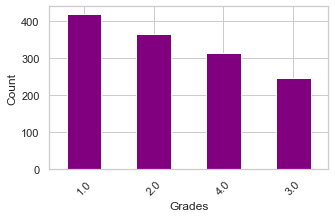

In [354]:
# Grade 1 (9th grade) has the largest count
countByGrade = sc.grade.value_counts()
countByGrade.plot.bar(xlabel = 'Grades', ylabel= 'Count', figsize = (5,3), rot = 45, color = 'purple');

I created some bar charts showing the relationships between these factors.

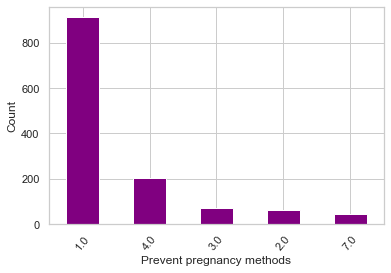

In [355]:
pre = sc.q65.value_counts().head()
pre.plot.bar(xlabel = 'Prevent pregnancy methods', ylabel= 'Count', figsize = (6,4), rot = 50
                          , color = 'purple');

From this chart, we can see that most people never had sexual intercourse (option 1), and people choose to prevent pregnancy by option 4 (condoms). 

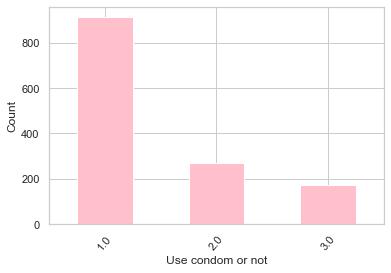

In [356]:
pre2 = sc.q64.value_counts().head()
pre2.plot.bar(xlabel = 'Use condom or not', ylabel= 'Count', figsize = (6,4), rot = 50
                          , color = 'pink');

From this chart, we can see that most people never had sexual intercourse (option 1), and more people chose to use condoms (option 2) than those who didn't (option 3). However, there is still a certain number of people who don't use condoms.

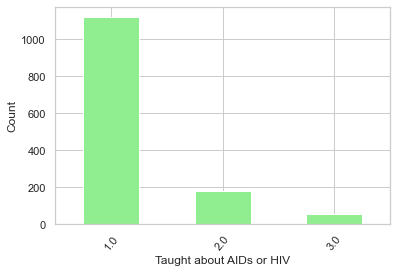

In [357]:
hiv = sc.qtaughtHIV.value_counts().head()
hiv.plot.bar(xlabel = 'Taught about AIDs or HIV', ylabel= 'Count', figsize = (6,4), rot = 50
                          , color = 'lightgreen');

From this chart, we can see that most people have learnt about AIDS or HIV infection in school (option 1), but there are still some people who didn't learn or not sure.

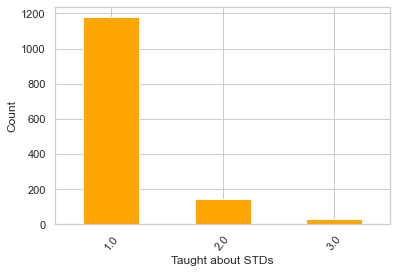

In [358]:
std = sc.qtaughtstd.value_counts().head()
std.plot.bar(xlabel = 'Taught about STDs', ylabel= 'Count', figsize = (6,4), rot = 50
                          , color = 'orange');

From this chart, we can see that most people have been taught in school about sexually transmitted diseases (STDs). some people didn't learn or not sure.

Next, I want to investigate some health-related behaviors for people in NY in 1997. I analyzed their age, smoking and alcohol habits, and marijuana and cocaine habits.

In [359]:
# Select specific columns
ny = dfyr[(dfyr.sitecode == 'NY') & (dfyr.year == 1997)][['sitename','age','qcigschool','qalcoholschool', 'qmarijuanaschool','qcurrentcocaine']]
# Check if there are any missing values in these columns
ny.isnull().sum()

sitename             0
age                  6
qcigschool          63
qalcoholschool      38
qmarijuanaschool    35
qcurrentcocaine     23
dtype: int64

I organized the data.

In [360]:
# Fill some missing values with associated means or medians
ny.fillna({'age':ny['age'].mean(),'qcigschool':ny['qcigschool'].median(),'qalcoholschool':ny['qalcoholschool'].median(),'qmarijuanaschool':ny['qmarijuanaschool'].median(), 
                           'qcurrentcocaine':ny['qcurrentcocaine'].median()}
                          ,inplace=True)
ny.head()

,sitename,age,qcigschool,qalcoholschool,qmarijuanaschool,qcurrentcocaine
540181,New York (NY),3.0,3.0,1.0,6.0,1.0
540182,New York (NY),4.0,6.0,2.0,1.0,3.0
540183,New York (NY),5.0,1.0,1.0,1.0,1.0
540184,New York (NY),5.0,1.0,1.0,1.0,1.0
540185,New York (NY),5.0,3.0,1.0,1.0,1.0


In [361]:
# Extract the columns I want to analyze
ny2 = ny[['qcigschool','qalcoholschool','qcurrentcocaine']]
ny2

,qcigschool,qalcoholschool,qcurrentcocaine
540181,3.0,1.0,1.0
540182,6.0,2.0,3.0
540183,1.0,1.0,1.0
540184,1.0,1.0,1.0
540185,3.0,1.0,1.0
...,...,...,...
543917,1.0,1.0,1.0
543918,1.0,1.0,1.0
543919,1.0,1.0,1.0
543920,1.0,2.0,1.0


Since these values are frequency (the higher the number is, the higher the frequency), I want to find out the correlation.

In [362]:
ny2.corr()

,qcigschool,qalcoholschool,qcurrentcocaine
qcigschool,1.000000,0.297737,0.229485
qalcoholschool,0.297737,1.000000,0.507085
qcurrentcocaine,0.229485,0.507085,1.000000


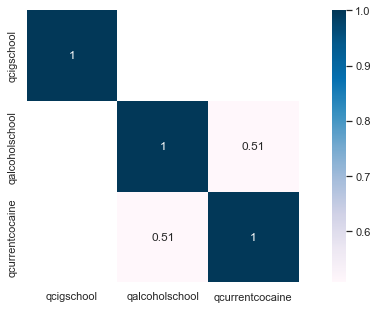

In [363]:
# Heatmap
corrmat = ny2.corr()
sns.heatmap(corrmat[corrmat>0.4], square = True, cmap="PuBu",annot=True); 

From both the correlation chart and the heat map, we can know that people's usage of alcohol and cocaine have more correlation (=0.51), and they are positively correlated.

Next, I want to do analysis on people's muscle strength and exercise-related drinking habits. I chose people in FL in 2015. I first organized the data.

In [364]:
# Choose sitecode "FL" in 2015, select specific rows and columns in the dataset, and check missing values
fl = dfyr.loc[380000:382200, ['sitename','age','qmusclestrength','qsunscreenuse','qsportsdrink','qenergydrink']]
fl.isnull().sum()

sitename             0
age                  0
qmusclestrength     70
qsunscreenuse      175
qsportsdrink        64
qenergydrink       141
dtype: int64

In [365]:
# Fill blank values with median
fl = dfyr.loc[380000:382200, ['sitename','age','qmusclestrength','qsunscreenuse','qsportsdrink','qenergydrink']]
fl.fillna({'qmusclestrength':fl['qmusclestrength'].median(),'qsunscreenuse':fl['qsunscreenuse'].median(),
           'qsportsdrink':fl['qsportsdrink'].median(),'qenergydrink':fl['qenergydrink'].median()},inplace=True)
fl

,sitename,age,qmusclestrength,qsunscreenuse,qsportsdrink,qenergydrink
380000,Florida (FL),4.0,8.0,1.0,7.0,7.0
380001,Florida (FL),4.0,3.0,4.0,1.0,1.0
380002,Florida (FL),4.0,7.0,1.0,2.0,1.0
380003,Florida (FL),4.0,8.0,1.0,1.0,1.0
380004,Florida (FL),4.0,4.0,4.0,4.0,6.0
...,...,...,...,...,...,...
382196,Florida (FL),7.0,5.0,2.0,2.0,1.0
382197,Florida (FL),7.0,3.0,2.0,1.0,1.0
382198,Florida (FL),7.0,5.0,2.0,1.0,1.0
382199,Florida (FL),7.0,1.0,1.0,3.0,1.0


I wanted to create decision trees, so I changed the variables into binary variables.

In [366]:
# Binning "age" to binary variables
ga = fl['age']
bins = [1,4,7] 
bin_names = ['young', 'senior']

fl['age_category'] = pd.cut(ga,bins,labels=bin_names)
print(fl.age_category.value_counts())
fl[['age','age_category']]

senior    1849
young      352
Name: age_category, dtype: int64


,age,age_category
380000,4.0,young
380001,4.0,young
380002,4.0,young
380003,4.0,young
380004,4.0,young
...,...,...
382196,7.0,senior
382197,7.0,senior
382198,7.0,senior
382199,7.0,senior


In [367]:
# Binning "qmusclestrength" to binary variables
muscle = fl['qmusclestrength']
bins = [0,4,8] 
bin_names = ['Less', 'More']

fl['qmuscle_category'] = pd.cut(muscle,bins,labels=bin_names)
print(fl.qmuscle_category.value_counts())
fl[['qmusclestrength','qmuscle_category']]

Less    1647
More     554
Name: qmuscle_category, dtype: int64


,qmusclestrength,qmuscle_category
380000,8.0,More
380001,3.0,Less
380002,7.0,More
380003,8.0,More
380004,4.0,Less
...,...,...
382196,5.0,More
382197,3.0,Less
382198,5.0,More
382199,1.0,Less


In [368]:
# Binning "qsunscreenuse" to binary variables
sun = fl['qsunscreenuse']
bins = [0,3,5] 
bin_names = ['rarely', 'frequent']

fl['qsunscreenuse_category'] = pd.cut(sun,bins,labels=bin_names)
print(fl.qsunscreenuse_category.value_counts())
fl[['qsunscreenuse','qsunscreenuse_category']]

rarely      1941
frequent     260
Name: qsunscreenuse_category, dtype: int64


,qsunscreenuse,qsunscreenuse_category
380000,1.0,rarely
380001,4.0,frequent
380002,1.0,rarely
380003,1.0,rarely
380004,4.0,frequent
...,...,...
382196,2.0,rarely
382197,2.0,rarely
382198,2.0,rarely
382199,1.0,rarely


In [369]:
# Binning "qsportsdrink" to binary variables
sports = fl['qsportsdrink']
bins = [0,4,7] 
bin_names = ['not often', 'often']

fl['qsportsdrink_category'] = pd.cut(sports,bins,labels=bin_names)
print(fl.qsportsdrink_category.value_counts())
fl[['qsportsdrink','qsportsdrink_category']]

not often    2070
often         131
Name: qsportsdrink_category, dtype: int64


,qsportsdrink,qsportsdrink_category
380000,7.0,often
380001,1.0,not often
380002,2.0,not often
380003,1.0,not often
380004,4.0,not often
...,...,...
382196,2.0,not often
382197,1.0,not often
382198,1.0,not often
382199,3.0,not often


In [370]:
# Binning "qenergydrink" to binary variables
energy = fl['qenergydrink']
bins = [0,4,7] 
bin_names = ['not often', 'often']

fl['qenergydrink_category'] = pd.cut(energy,bins,labels=bin_names)
print(fl.qenergydrink_category.value_counts())
fl[['qenergydrink','qenergydrink_category']]

not often    2160
often          41
Name: qenergydrink_category, dtype: int64


,qenergydrink,qenergydrink_category
380000,7.0,often
380001,1.0,not often
380002,1.0,not often
380003,1.0,not often
380004,6.0,often
...,...,...
382196,1.0,not often
382197,1.0,not often
382198,1.0,not often
382199,1.0,not often


In [371]:
# Print the category names
print(fl['age_category'].unique())
print(fl['qmuscle_category'].unique())
print(fl['qsunscreenuse_category'].unique())
print(fl['qsportsdrink_category'].unique())
print(fl['qenergydrink_category'].unique())

['young', 'senior']
Categories (2, object): ['young' < 'senior']
['More', 'Less']
Categories (2, object): ['Less' < 'More']
['rarely', 'frequent']
Categories (2, object): ['rarely' < 'frequent']
['often', 'not often']
Categories (2, object): ['not often' < 'often']
['often', 'not often']
Categories (2, object): ['not often' < 'often']


Besides, I converted binary variables to dummies.

In [372]:
# Convert these variables into dummies
# "qmuscle_category_More" is the dependent variable
# I want to predict: For a given person, what is the number/class of days that he/she strengthen his/her muscle?
fl = pd.get_dummies(fl)
fl.head()

,age,qmusclestrength,qsunscreenuse,qsportsdrink,qenergydrink,sitename_Florida (FL),age_category_young,age_category_senior,qmuscle_category_Less,qmuscle_category_More,qsunscreenuse_category_rarely,qsunscreenuse_category_frequent,qsportsdrink_category_not often,qsportsdrink_category_often,qenergydrink_category_not often,qenergydrink_category_often
380000,4.0,8.0,1.0,7.0,7.0,1,1,0,0,1,1,0,0,1,0,1
380001,4.0,3.0,4.0,1.0,1.0,1,1,0,1,0,0,1,1,0,1,0
380002,4.0,7.0,1.0,2.0,1.0,1,1,0,0,1,1,0,1,0,1,0
380003,4.0,8.0,1.0,1.0,1.0,1,1,0,0,1,1,0,1,0,1,0
380004,4.0,4.0,4.0,4.0,6.0,1,1,0,1,0,0,1,1,0,0,1


In [373]:
# Prepare data for decision tree classifier: Define x1, y1
# Drop the dependent variable
X1 = fl.drop('qmuscle_category_More', axis=1) 
y1 = fl.qmuscle_category_More

X1.head()

,age,qmusclestrength,qsunscreenuse,qsportsdrink,qenergydrink,sitename_Florida (FL),age_category_young,age_category_senior,qmuscle_category_Less,qsunscreenuse_category_rarely,qsunscreenuse_category_frequent,qsportsdrink_category_not often,qsportsdrink_category_often,qenergydrink_category_not often,qenergydrink_category_often
380000,4.0,8.0,1.0,7.0,7.0,1,1,0,0,1,0,0,1,0,1
380001,4.0,3.0,4.0,1.0,1.0,1,1,0,1,0,1,1,0,1,0
380002,4.0,7.0,1.0,2.0,1.0,1,1,0,0,1,0,1,0,1,0
380003,4.0,8.0,1.0,1.0,1.0,1,1,0,0,1,0,1,0,1,0
380004,4.0,4.0,4.0,4.0,6.0,1,1,0,1,0,1,1,0,0,1


In [374]:
# Split to training and test dataset
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X1, y1, test_size=0.15, random_state=23)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.2, random_state=23)

In [375]:
# Confirm their sizes
print('X_train Shape:',X_train.shape)
print('X_test Shape:',X_test.shape)
print('X_val Shape:',X_val.shape)
print('')
print('Y_train Shape:',y_train.shape)
print('Y_test Shape:',y_test.shape)
print('Y_val Shape:',y_val.shape)

X_train Shape: (1496, 15)
X_test Shape: (331, 15)
X_val Shape: (374, 15)

Y_train Shape: (1496,)
Y_test Shape: (331,)
Y_val Shape: (374,)


My objective is to predict whether a given person usually strengthen his/her muscle or not.

In [376]:
# Fit the data into the algorithm
clftree = DecisionTreeClassifier(max_leaf_nodes=6, max_features=2, random_state=23)
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_features=2, max_leaf_nodes=6, random_state=23)

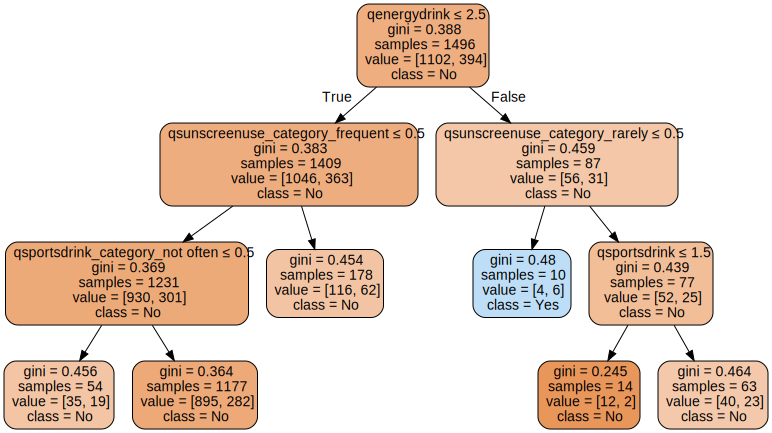

In [377]:
# Visualize and plot the tree
# If true in the first class: the majority class is No, so it predicts No
graphClf = print_tree(d_tree=clftree, f_names=X1.columns, c_names=['No', 'Yes'])
graphClf

qenergydrink was decided to be the most important variable. From the plot, we can know that we first have 1496 samples in total, including 1102 "rarely" and 394 "frequent". The dependent variable is qmusclestrength. 

In [378]:
# Validation Set Performance Evaluation
print("Validation Set Classification Accuracy:", clftree.score(X_val,y_val))

# Confusion matrix
print("Confusion Matrix:")
cm = pd.DataFrame(confusion_matrix(y_val, clftree.predict(X_val)), index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
display(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_val, clftree.predict(X_val)))
# 75 percent accuracy
# True negative: 282, True positive: 0, False negative: 90, False positive: 2

Validation Set Classification Accuracy: 0.7540106951871658
Confusion Matrix:


Predicted,No,Yes
Actual,,
No,282,2
Yes,90,0


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       284
           1       0.00      0.00      0.00        90

    accuracy                           0.75       374
   macro avg       0.38      0.50      0.43       374
weighted avg       0.58      0.75      0.65       374



These are the results and confusion matrix. The accuracy is 75 percent.

I guess doing sports is also an critical factor of bmi, so I want to look at PE (physical education) classes, sports team, and bmi data in AL in 1999.

I first deal with the useful data.

In [379]:
# Choose sitecode "AL" in 1999, select specific rows and columns in the dataset, and check missing values
al = dfyr.loc[73936:76030, ['sitename','year','age','bmi','q68','q72','q82','q83']]
al.isnull().sum()

sitename      0
year          0
age           2
bmi          55
q68          13
q72          17
q82         142
q83          43
dtype: int64

In [380]:
# Fill in missing values with mean and median
al.fillna({'age':al['age'].mean(),'bmi':al['bmi'].mean(),'q68':al['q68'].median(),
           'q72':al['q72'].median(),'q82':al['q82'].median()},inplace=True)
al.head()

,sitename,year,age,bmi,q68,q72,q82,q83
73936,Alabama (AL),1999,5.000000,21.475918,3.0,2.0,6.0,1.0
73937,Alabama (AL),1999,7.000000,47.087585,4.0,1.0,1.0,1.0
73938,Alabama (AL),1999,5.247492,17.427913,3.0,2.0,1.0,1.0
73939,Alabama (AL),1999,1.000000,23.154041,5.0,1.0,1.0,1.0
73940,Alabama (AL),1999,2.000000,22.082032,3.0,2.0,6.0,1.0


I changed variables about PE class and sports team into numerical data.

In [381]:
# Create a new column and change original categorical data into numerical data
al['PEclass'] = al.q82 - 1
al.head()

,sitename,year,age,bmi,q68,q72,q82,q83,PEclass
73936,Alabama (AL),1999,5.000000,21.475918,3.0,2.0,6.0,1.0,5.0
73937,Alabama (AL),1999,7.000000,47.087585,4.0,1.0,1.0,1.0,0.0
73938,Alabama (AL),1999,5.247492,17.427913,3.0,2.0,1.0,1.0,0.0
73939,Alabama (AL),1999,1.000000,23.154041,5.0,1.0,1.0,1.0,0.0
73940,Alabama (AL),1999,2.000000,22.082032,3.0,2.0,6.0,1.0,5.0


In [382]:
# Create a new column and change original categorical data into numerical data
al['sportsteam'] = al.q83 - 1
al.head()

,sitename,year,age,bmi,q68,q72,q82,q83,PEclass,sportsteam
73936,Alabama (AL),1999,5.000000,21.475918,3.0,2.0,6.0,1.0,5.0,0.0
73937,Alabama (AL),1999,7.000000,47.087585,4.0,1.0,1.0,1.0,0.0,0.0
73938,Alabama (AL),1999,5.247492,17.427913,3.0,2.0,1.0,1.0,0.0,0.0
73939,Alabama (AL),1999,1.000000,23.154041,5.0,1.0,1.0,1.0,0.0,0.0
73940,Alabama (AL),1999,2.000000,22.082032,3.0,2.0,6.0,1.0,5.0,0.0


Most people go to physical education (PE) classes more than 4 days, and most people play at least 1 sports team.

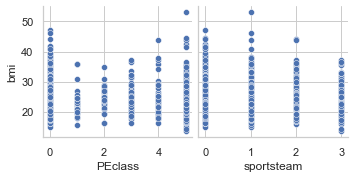

In [383]:
sns.pairplot(data=al, y_vars=['bmi'], x_vars=['PEclass', 'sportsteam'], diag_kind = None);

In [384]:
# Extract columns about "bmi", "PEclass", "Sportsteam"
al2 = al[['bmi','q82','q83']]
al2.head()

,bmi,q82,q83
73936,21.475918,6.0,1.0
73937,47.087585,1.0,1.0
73938,17.427913,1.0,1.0
73939,23.154041,1.0,1.0
73940,22.082032,6.0,1.0


I tried to find correlation between these variables.

In [385]:
# Find the correlation between these 3 variables
al2.corr()

,bmi,q82,q83
bmi,1.000000,-0.002439,-0.018628
q82,-0.002439,1.000000,0.326435
q83,-0.018628,0.326435,1.000000


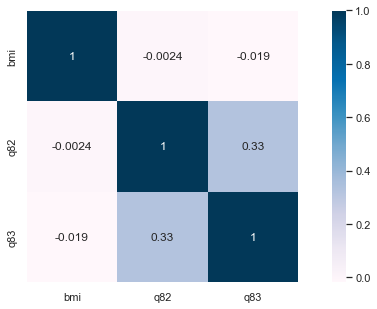

In [386]:
# Draw a correlation heatmap 
corrmat = al2.corr()
sns.heatmap(corrmat, square = True, cmap="PuBu",annot=True); 

Most of the correlations are low.

Last but not least, I believe there might also be a correlation between high calories foods and people's bmi. So, I select people who drink more sugar drink and eat more fastfood.

In [387]:
# Choose people who often drink sugar drink and eat fast
food = dfyr[(dfyr.qsugardrink >1) & (dfyr.qfastfood>4)][['year','age','sex','bmi','qsugardrink','qfastfood']]
food.head()

,year,age,sex,bmi,qsugardrink,qfastfood
832816,2013,1.0,NaN,52.882396,5.0,8.0
832818,2013,4.0,NaN,16.391283,2.0,6.0
832823,2013,1.0,2.0,23.620755,3.0,5.0
832842,2013,3.0,2.0,17.753773,2.0,5.0
832846,2013,3.0,2.0,16.379630,2.0,5.0


In [388]:
# Among these people, the highest bmi
food.bmi.max()

52.88239591

In [389]:
# See how many sugar drinks and fast food this person consume
food[(food.bmi == 52.88239591)][['bmi','qsugardrink','qfastfood']]

,bmi,qsugardrink,qfastfood
832816,52.882396,5.0,8.0


We can know that people who has the highest bmi consume a lot of sugar drink (qsugardrink=5, 2 times per day) and fastfood (qfastfood=8, 7 days at least 1 meal fastfood).

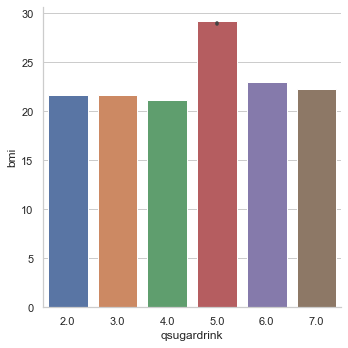

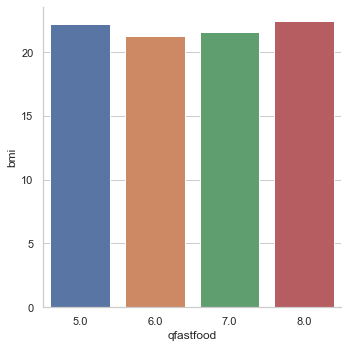

In [390]:
# Create charts that show the relationship between bmi and sugar drink and fast food
sns.catplot(x="qsugardrink", y="bmi", kind="bar", data=food, ci=True);
sns.catplot(x="qfastfood", y="bmi", kind="bar", data=food, ci=True);

## Summary

Based on different aspects I analyzed, these are my findings and conclusion:
- There is a certain number of young people who don’t prevent pregnancy, and some people didn’t learn about AIDS, HIV infection and sexually transmitted diseases (STDs) in school.
- People’s habit of drinking alcohol has positive correlation with usage of cocaine.
- People’s frequency of strengthening their muscle can be depended on how many times they drink energy drinks.
- Most people go to PE classes or join sports team.
- From a diet aspect, people who have the highest bmi consume a lot of sweetened beverage and fast food.

I believe young people should be taught more at school about sexual protection knowledge, how harmful habits can cause bad effects, and how food can affect our body shape, because these are all important to their health.